# Differential gene expression

Using Normalisr.

# 0. Loading the libraries

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import gseapy as gp
from gseapy.plot import dotplot

import normalisr.normalisr as norm
from adjustText import adjust_text

from pyorthomap import findOrthologsHsMm

import pickle

def save_object(obj, filename):
    with open(filename, 'wb') as outp:  # Overwrites any existing file.
        pickle.dump(obj, outp, pickle.HIGHEST_PROTOCOL)

2022-06-17 14:20:28.003292: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/R/lib/R/lib:/opt/R/lib/R/lib:
2022-06-17 14:20:28.003382: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [ ]:
# Set up constants
save_folder = "figures/"
objects_folder = "saved_objects/"
sc.settings.figdir = './'+save_folder

plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3

# 1. Reading in the data

In [ ]:
# Load the pre-processed data

with open('saved_objects/adata_annotated.pkl', 'rb') as inp:
    adata = pickle.load(inp)

# 2. Differential expression

In [48]:
deg1 = pd.read_excel("figures/"+"deg11_N6vsDMSO_2h_normalisr"+".xlsx", sheet_name = "significant", header = 0)
deg2 = pd.read_excel("figures/"+"deg11_N6vsDMSO_24h_normalisr"+".xlsx", sheet_name = "significant", header = 0)
deg3 = pd.read_excel("figures/"+"deg11_N6vsDMSO_48h_normalisr"+".xlsx", sheet_name = "significant", header = 0)
deg4 = pd.read_excel("figures/"+"deg11_N6vsDMSO_d7_normalisr"+".xlsx", sheet_name = "significant", header = 0)
deg5 = n6_6[n6_6.Gene.isin(adata.var_names.tolist())]
deg5.columns = ["Symbol", 'log2fc', 'fc', 'gene']
deg5['fc'] = [1/e for e in deg5['fc']]
deg5['log2fc'] = [-e for e in deg5['log2fc']]

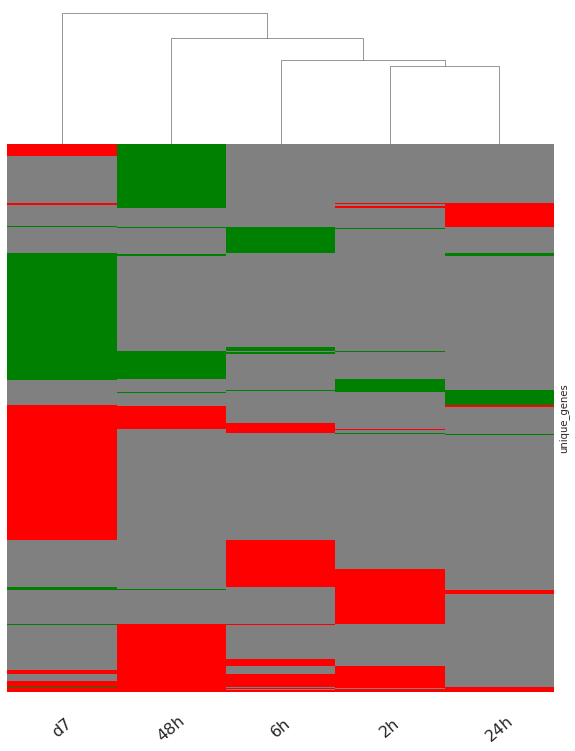

In [49]:
all_genes = adata.var_names
hmdata = pd.DataFrame(index=all_genes)
degs = [deg1, deg2, deg3, deg4, deg5]
name_degs = ['2h', '24h', '48h', 'd7', '6h']

b=1

for i in range(5):

    hmdata[name_degs[i]] = 0
    for gene in degs[i][degs[i]['fc'] > b]['gene'].tolist():
        hmdata.loc[gene, name_degs[i]] = 1
    for gene in degs[i][degs[i]['fc'] < (1/b)]['gene'].tolist():
        hmdata.loc[gene, name_degs[i]] = -1
sig = np.sum(abs(hmdata), axis = 1)
hmdata = hmdata[sig > 0]
filt = [e == e for e in hmdata.index]
hmdata = hmdata[filt]

from matplotlib import colors
cmap = colors.ListedColormap(['green','grey','red'])
plot = sb.clustermap(hmdata, yticklabels=False, vmin = -1, vmax = 1, cmap = cmap, cbar_pos = None)
plot.ax_row_dendrogram.set_visible(False)
plot.ax_row_dendrogram.set_xlim([0,0])
plt.setp(plot.ax_heatmap.xaxis.get_majorticklabels(), rotation=40, va="center", position=(0,-0.06), size = 16)
plot.savefig("figures/hm_inter_n6vdmso.png")

In [14]:
#Define a nice colour map for gene expression
colors2 = plt.cm.Reds(np.linspace(0, 1, 128))
colors3 = plt.cm.Greys_r(np.linspace(0.7,0.8,35))
colorsComb = np.vstack([colors3, colors2])
mymap = colors.LinearSegmentedColormap.from_list('my_colormap', colorsComb)

In [63]:
BIGLIST = degs[4]
BIGLIST = BIGLIST[BIGLIST.fc < b].gene.tolist()
for e in BIGLIST:
    print(e)

Cd24a
Acad11
Nup93
Syk
Ccr6
Gmps
Ddt
Grb2
Fcgr2b
Ccr7
Parp1
Cxcr5
Fryl
Gng4
Fcer2a
Ninj1
Rftn1
Bcar3
Tgfb1
Ninj1
Spata13
Wdr26
Pim1
St3gal6
Rnf157
Hlcs
Sdc4
Grap
Jak1
Card6
Ralgps2
Klf13
Igf1r
Rnf145
Gdi2
S100a10
Snx9
Zfp52
Polr3h
Sema7a
Gadd45a
Foxo3
Smap2
Rasd1
Ccr9
Sec31a
Pde7a
Prdm1
Foxo1
Mknk2
Zfp106
Cd2
Csf2rb
Foxo1
Tec
Shmt1
Fam107b
Mylip
Mpv17
Litaf
Slc10a7
Cry2
Cd83
Laptm5
Skp1a
Id3
Syngr2
Mlec
Ly6e


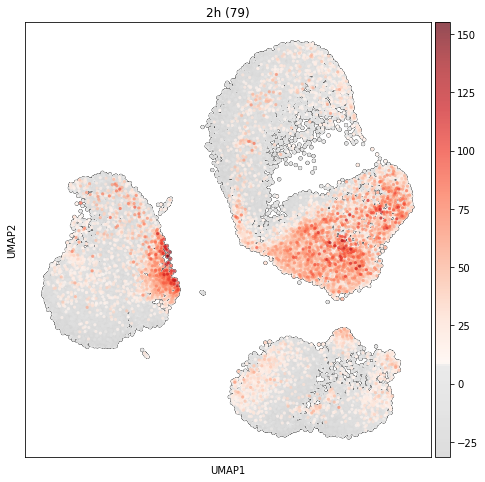

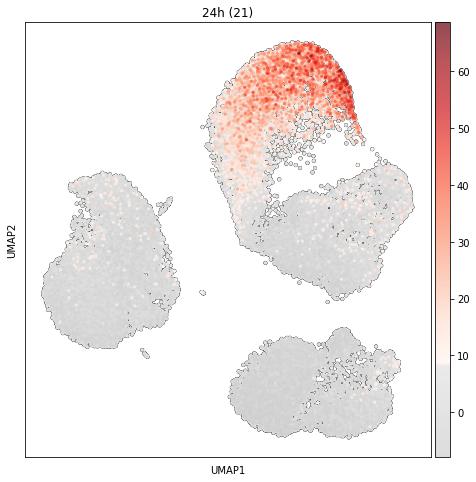

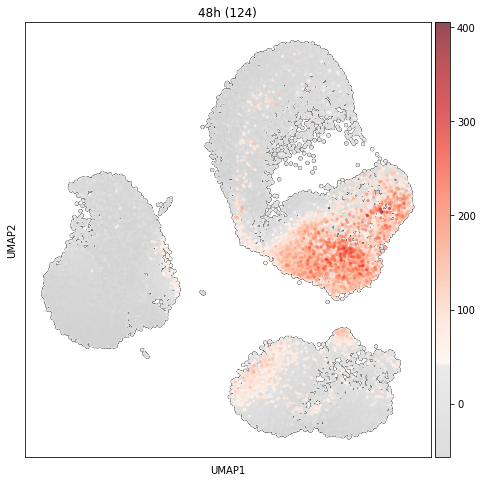

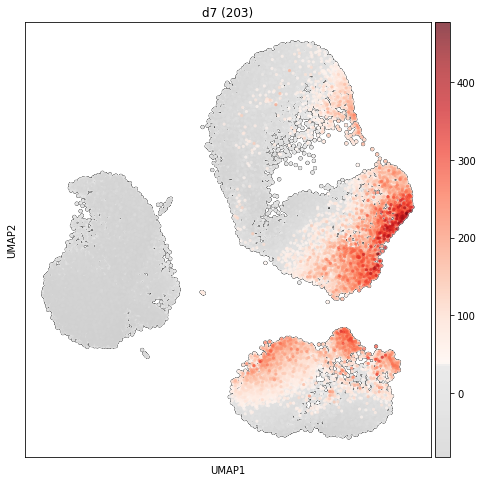

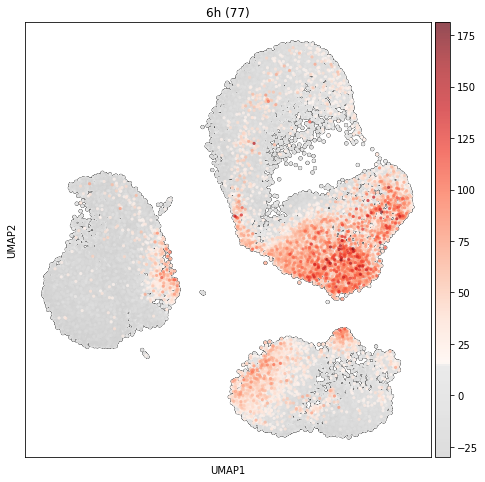

In [44]:
plt.rcParams['figure.figsize']=(8,8)
b = 5

for i in range(5):
    
    BIGLIST = degs[i]
    BIGLIST = BIGLIST[BIGLIST.fc > b].gene.tolist()
    name = name_degs[i]
    av = pd.DataFrame(0, index=adata.obs.index, columns=['mean'])
    for mark in BIGLIST:
        av['mean'] += adata.X[:, adata.var['gene_name'] == mark][:,0]
    adata.obs[name] = av['mean']
    sc.pl.umap(adata, cmap = mymap, color = name, size = 40, add_outline = True, outline_width = [0.1, 0.05],
                ncols = 2, title = name+" ("+str(len(BIGLIST))+")", save = "_mean_hm_"+name+".png")

In [35]:
d = results_list[0]

In [36]:
results_list = [d[(d.gene.isin(deg5.gene.tolist())) & (d.gene.isin(deg1.gene.tolist()))]]
names = ["deg_2h_inter_6h"]

Copy